# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Não Supervisionada
## Projeto: Criando Segmentos de Clientela

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [126]:

''' Nome: David Manoel Vidal; E-mail: kinetics.parse@gmail.com; Cel: (16) 99222-7355; Compilado em: Python Versão 3.7.0 '''

import numpy as np
import pandas as pd
import visuals as vs
import matplotlib.pyplot as plt
import sklearn.metrics as mt 

from IPython.display import display
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn import datasets, mixture
from sklearn.metrics import silhouette_score

# diretriz para que gráficos sejam exibidos abaixo dos códigos no ambiente de programação
%matplotlib inline
    

In [45]:

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv( 'customers.csv' )
    data.drop([ 'Region', 'Channel' ], axis = 1, inplace = True)
    print( 'Wholesale customers dataset has {} samples with {} features each.' .format( *data.shape ))
except:
    print( 'Dataset could not be loaded. Is the dataset missing?' )
    

Wholesale customers dataset has 440 samples with 6 features each.


## Explorando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'** (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios). Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [46]:

# exibe a descrição do conjunto de dados
display( data.describe() )

# exibe registros do conjunto de dados
data


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [47]:

# seleciona índices da amostra do conjunto de dados
indices = [ 100, 200, 300 ]

# crie um DataFrame das amostras escolhidas
data_samples = pd.DataFrame( data.loc[ indices ], columns = data.keys() ).reset_index( drop = True )

# exibe resultado
print( '\nAmostra Extraída do Conjunto de Dados:' )
display( data_samples )



Amostra Extraída do Conjunto de Dados:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resp. 1: Conforme as três amostras extraídas do conjunto original, segue respectivas análises sobre as compras dos produtos os quais se enquadram nas 6 categorias listadas de compra Fresh ( Perecíveis ), Milk ( Lacticínios ), Grocery ( Secos e Molhados ), Frozen ( Congelados ), Detergents_Paper ( Limpeza/Higiene ), Delicatessen ( Padaria/Frios ):**

- índice 0, conforme as 3 maiores compras nas respectivas categorias ( Secos e Molhados, Perecíveis & Limpeza/Higiene ) os estabelecimentos possíveis que este cliente pode ter são: um bar, restaurante ou pub ( bar & boate juntos ).

- índice 1, conforme as 3 maiores compras nas respectivas categorias ( Secos e Molhados, Laticínios & Limpeza/Higiene ) os estabelecimentos possíveis que este cliente pode ter são: uma indústria de pães artesanais e/ou massas, padaria ou restaurante.

- índice 2, conforme as 3 maiores compras nas respectivas categorias ( Perecíveis, Secos e Molhados & Laticínios ) os estabelecimentos possíveis que este cliente pode ter são: lanchonete, restaurante ou um bar.

**IMPORTANTE! A análise pressupõe IDEIAS de negócios que o cliente deva ter, estes são palpites baseado nas respectivas compras maiores dentre as 6 categorias listadas, o que pode mudar de acordo com as regras de negócio, frequencia de consumo dos produtos ou uso em si dos produtos para satisfazer as necessidades pessoais/de mercado. Por carecer de maiores detalhes as as análises podem estar erradas ou euqivocadas, dai serem uma IDEIA ( teroia ) de possíveis negócios, o que NÃO significa que seja realmente assim ( prática ).**

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [125]:

# cria uma cópia do DataFrame, elimina a coluna MILK, a qual iremos buscar
X_DataFrame = data.copy()
X_DataFrame.drop( [ 'Milk' ], axis = 1, inplace = True )

# cria uma cópia do DataFrame, contendo SOMENTE a coluna Milk ( target )
y_DataFrame = data[ 'Milk' ].copy()



# realiza divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_true = train_test_split( X_DataFrame, y_DataFrame, test_size = 0.25 )



# cria árvore de decisão de regressão
ml_Mod   = DecisionTreeRegressor( random_state=0 )

# faz uma análise de validação cruzada
analyze  = cross_val_score( ml_Mod, X_train, y_train, cv=11 )
print( 'analisa possibilidades de score de validação cruzada: ')
print( analyze )

# realiza o treinamento do algoritmo modelo
ml_Mod.fit( X_train, y_train )

# retorna o score do teste
score = ml_Mod.score( X_test, y_true )
score


analisa possibilidades de score de validação cruzada: 
[-0.02904566  0.47142838  0.07988358  0.15030803  0.43516287  0.25106351
  0.69920585  0.46130614 -0.72185774  0.46329934  0.18425683]


0.6444728855786022

### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resp. 2.1: Busquei prever gastos com o grupo dos Laticínios ( Milk ). Resp. 2.2: A pontuação da previsão foi 0.6444 ( 64% aproximadamente ). Resp. 2.3: Sim, pode-se afirmar que o atributo Milk é extremamente necessário para determinar hábitos de compra de um cliente. Leia abaixo as justificativas sobre as 3 respostas em questão juntas.**


**IMPORTANTE!!**

**Nota 1 - Embora o score do modelo tenha sido de aproximados 60%, a cada vez em que o algoritmo é treinado a pontuação muda, em virtude da quantidade de dados que estão a ser usados para treinar o modelo. É inconclusivo afirmar que seria uma boa pontuação para esse algorito em questão, neste cenário em específico.**

**Nota 2 - O atributo Milk é necessário para identificar os hábitos de compra de um cliente, uma vez que pela lógica quase tudo o que pertence ao Universo da Gatronomia ( pães, massas, caldos, bolos, doces, pratos simples, pratos sofisticados, salgados, enfim, quase tudo o que existe ) tende a utilizar latícinios de algum gênero ( queijos, requeijão, leite, creme de leite, leite condensado, creme de ricota, etc ) nas receitas. Sobretudo se observar nas estatísticas da tabela, o atributo Milk corresponde ao 3 maior gasto pelos clientes de modo geral, o que confirma a teoria na prática.**

**Nota 3 - A proposta anterior era determinar os hábitos de compra dos clientes ao excluir um atributo ( no caso escolhi Milk ) para prever suas tendências de compra ( ou seja, inferir, prever gastos com Milk, com base nos demais atributos ). Escolhi o campo Milk já sabendo que ele é um atributo FUNDAMENTAL para prever padrões de compra, afim de confirmar essa teoria, o que na prática se demonstrou pela pontuação score variar hora entre valores razoáveis, hora entre valores muito ruins. Fiz isso em função da CURIOSIDADE!**


### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Perecíveis,Lacticínios,Secos e Molhados,Congelados,Limpeza/Higiene,Padaria/Frios
Perecíveis,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Lacticínios,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Secos e Molhados,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Congelados,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Limpeza/Higiene,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Padaria/Frios,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


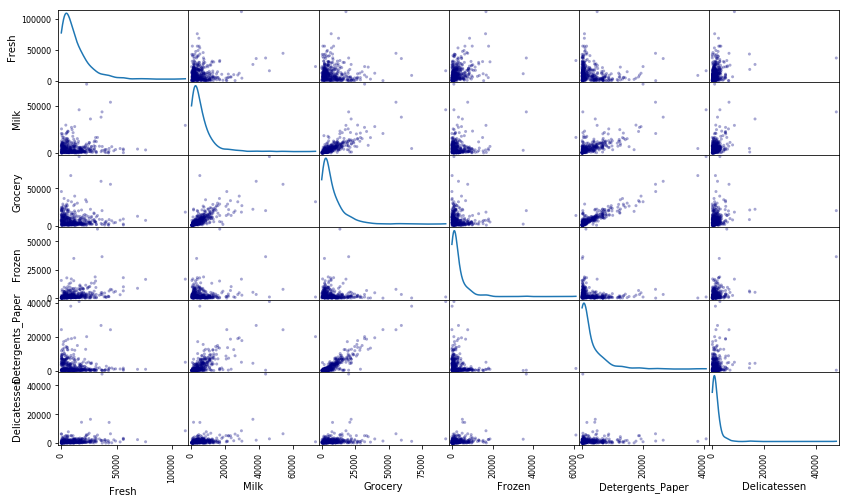

In [49]:

# produz uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.scatter_matrix( data, alpha = 0.35, figsize = ( 14,8 ), diagonal = 'kde', color='navy' );

# calcula a correlação paritária entre colunas, excluindo valores NA/null da análise
data_correlation = data.rename( index=str, columns={ 
    'Fresh'             : 'Perecíveis', 
    'Milk'              : 'Lacticínios', 
    'Grocery'           : 'Secos e Molhados', 
    'Frozen'            : 'Congelados', 
    'Detergents_Paper'  : 'Limpeza/Higiene', 
    'Delicatessen'      : 'Padaria/Frios'
})

data_correlation.corr( )


### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

**Resp. 3.1: Conforme matriz de dispersão, podemos observar que os dados de fato se apresentam aleatórios, dispersos entre si, onde de acordo com determinado atributo, os demais apresentam comportamentos específicos ( hora acompanham o crescimento, hora decrescem, hora não apresentam comportamento algum, sendo imprevisíveis ). Podemos notar também que os maiores gastos observados na tabela estatística ( describe ) é reproduzida na curva desenhada pelos gráficos, observe que Fresh ( Perecíveis ), Milk ( Laticínios ) e Grocery ( Secos e Molhados ) apresentam maiores COMPRIMENTOS no "cume" da curvatura, enquanto os demais atributos apresentam o "cume" estreito.**

**Resp. 3.2: Sim! Embora os atributos sejam dispersos entre si, a tabela de correlação dos atributos demonstra claramente que alguns dos atributos possuem correlação direta, muito próxima e marcante. Exemplo:**
- Lacticínios possue correlação forte a Secos & Molhados, depois a Limpeza & Higiêne;
- Secos e Molhados possue correlação forte a Limpeza & Higiêne, depois a Laticínios;
- Limpeza e Higiêne, possue correlação forte a Secos & Molhados, depois a Laticínios;
- Perecíveis, Congelados e Padaria e Frios NÃO POSSUEM correlação forte alguma com nenhum dos demais atributos;

**IMPORTANTE!! O nível de correlação é determinado em uma escala que varia de 0 ( nenhuma correlação ) a 1 ( correlação forte ). Valores que apresentem correlação igual ou superior a 0.5, demonstram possuir correlação forte, onde quanto maior o valor, maior se torna a correlação.**

**Resp. 3.3: Essas análises demonstram que o atributo Milk ( Laticínios ) embora esteja correlacionado a Secos & Molhados e a Limpeza & Higiêne, não apresenta a correlação FORTE de via de mão dupla, ou seja, Secos & Molhados e Limpeza & Higiêne não estão fortemente correlacionados em 1º grau a Laticínios, como Laticínios está para eles. Isso explicaria a precisão do algoritmo de regressão variar e não ser tão próxima de 1 quanto desejado. Muito embora também confirma a teoria de que o grupo de Laticínios apesar de não ter correlação forte de modo recíproco, ainda é um atributo forte, marcante na base de dados e que assim como na Teoria Vs na Prática realmente se demonstra ser um atributo de consumo marcante por a maioria dos clientes e dos Históricos de Compras.**

**Resp. 3.4: Os dados são distribuídos de modo aleatório de modo geral, ou seja, disperso. Os valores variam hora entre 0, hora entre 1 e suas respectivas correlações demonstram isso na prática, onde exibe seus respectivos comportamentos de terem ou não correlaçãos direta ou indireta; forte ou fraca. É importante também observar que quanto maior a correlação entre os atributos ( tabela de correlação ), no gráfico de dispersão isso se demonstra em os dados se apresentarem mais próximos, agrupados em si quando a correlação é forte - OU - apresentarem-se dispersos, quando a correlação é fraca.**

**IMPORTANTE!! As observações foram tomadas com base na "Visualizando a Distribuição de Atributos", onde são exibidos a gráfico de dispersão - E - a respectiva tabela de correlação.**

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado] ](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o algoritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
5,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
6,9.403107,8.070594,8.850088,6.173786,8.051978,6.300786
7,8.933137,8.508354,9.151227,7.419980,8.108021,7.850104
8,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
9,8.700514,9.314070,9.845911,7.055313,8.912608,7.648740


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  # This is added back by InteractiveShellApp.init_path()


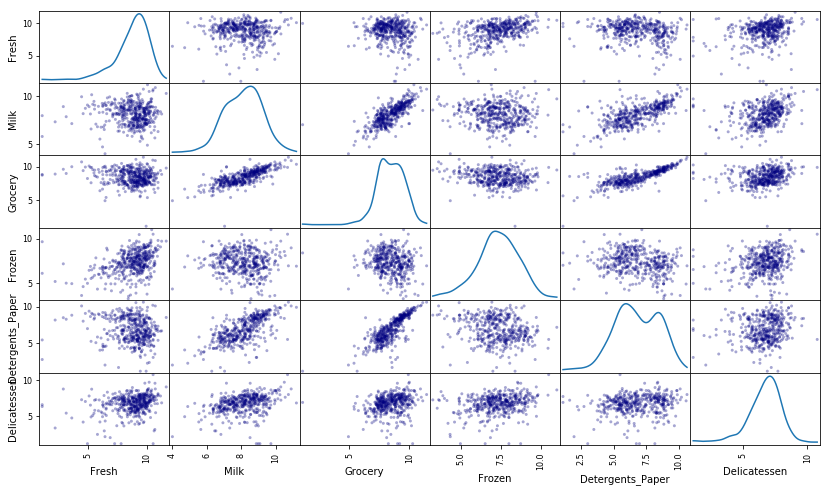

In [50]:

# escalona os dados utilizando o algoritmo natural
log_data = np.log( data )
display( log_data.head( 10 ))

# escalona a amostra de dados utilizando o algoritmo natural
log_samples = np.log( data_samples )
display( log_samples )

# produz uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.scatter_matrix( log_data, alpha = 0.35, figsize = ( 14,8 ), diagonal = 'kde', color='navy' );


### Observação
Após aplicar o algoritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [51]:

# exibe amostra de dados log-transformada
display( log_samples )


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399


### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [52]:

# para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # calcula Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile( log_data.loc[ :, feature ], 25 )
    
    # calcula Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile( log_data.loc[ :, feature ], 75 )
    
    # utiliza a amplitude interquartil para calcular o passo do discrepante ( 1,5 vezes a variação interquartil)
    step = 1.5 * ( Q3 - Q1)
    
    # exibe valores discrepantes
    print( "Data points considered outliers for the feature '{}':" .format( feature ))
    display( log_data[ ~(( log_data[ feature ] >= Q1 - step ) & ( log_data[ feature ] <= Q3 + step ))] )


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [53]:

# Especifica registros que apresentem Outliers em 02 ou mais atributos da tabela
# 065, outlier presente em: Fresh ( Perecíveis ) e Frozen ( Congelados ),
# 066, outlier presente em: Fresh ( Perecíveis ) e Delicatessen ( Padaria/Frios ), 
# 075, outlier presente em: Grocery ( Secos e Molhados ) e Detergents_Paper ( Limpeza/Higiene ),
# 128, outlier presente em: Fresh ( Perecíveis ) e Delicatessen ( Padaria/Frios ), 
# 154, outlier presente em: Milk ( Lacticínios ), Grocery ( Secos e Molhados ) e Delicatessen ( Padaria/Frios ), 
outliers  = [ 65, 66, 75, 128, 154 ]

# remove registros da base de dados
good_data = log_data.drop( log_data.index[outliers] ).reset_index( drop = True )


### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

**Resp. 4.1: Sim. Os respectivos pontos (índices) foram especificados na lista OUTLIERS acima.**
**Resp. 4.2: Sim. Uma vez que estão presentes em mais de um atributo.**
**Resp. 4.3: Todo outlier é considerado um valor extremo na estatística, fugindo a uma determinada regra / padrão na análise de dados. Neste caso em específico os outliers especificados apresentam-se em mais de um atributo, como dito anteriormente. Maiores detalhes ver os comentários no código, onde especifiquei em quais atributos os outliers ocorrem!**


## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

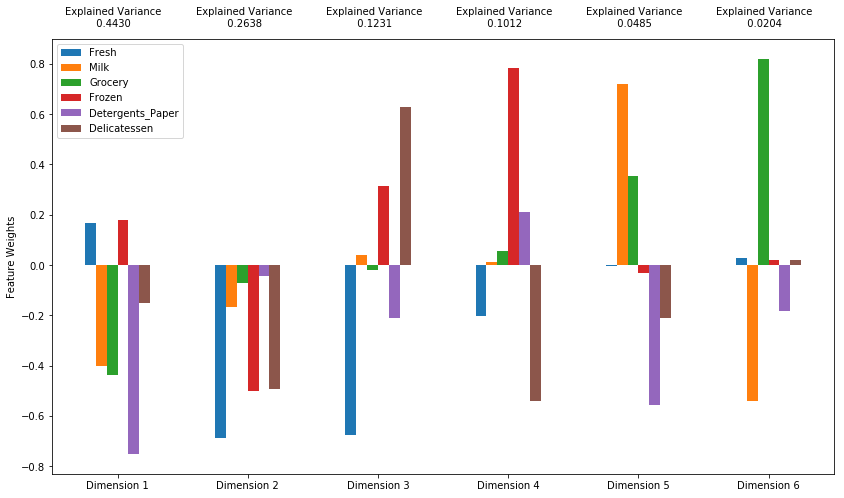

In [54]:

# implementa PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA( n_components=6 )
pca.fit( good_data )

# transforma a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform( log_samples )

# gera gráfico dos resultados da PCA
pca_results = vs.pca_results( good_data, pca )


### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resp. 5.1: A quantidade total de variância das duas primeiras dimensões do PCA é de 70,68%. As quatro primeiras dimensões do PCA tem uma variância de 93,11%.**

**Resp. 5.2: Conforme dimensões do gráfico PCA, segue**
- Dimensão Nº 01: Diminuição de gastos nas compras de  Detergents_Paper ( Limpeza & Higiene ), Grocery ( Secos & Molhados ) e  Milk ( Lacticínios );      
- Dimensão Nº 02: Diminuição de gastos nas compras de  Fresh ( Perecíveis ), Frozen ( Congelados ), Delicatessen ( Padaria & Frios );
- Dimensão Nº 03: Diminuição de gastos nas compras de  Fresh ( Perecíveis ),  Detergents_Paper ( Limpeza e Higiene ), Grocery ( Secos & Molhados ); contra o grande aumento nas compras de Delicatessen ( Padaria & Frios ) e Frozen ( Congelados ); 
- Dimensão Nº 04: Diminuição de gastos nas compras de Delicatessen ( Padaria/Frios ) e Fresh ( Perecíveis ); contra o aumento nas compras de Frozen ( Congelados ) e Detergents_Paper ( Limpeza & Higiene );

**Resp. 5.3: Conforme dimensões do gráfico PCA e da resposta na questão 3, segue**
- Dimensão Nº 01 confirma a ideia na resposta da questão 3 onde Detergents_Paper ( Limpeza & Higiene ), possue correlação forte a Grocery ( Secos & Molhados ), depois a Milk ( Lacticínios );

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [55]:

print( 'ANTES: ' )
display( log_samples )
    
# exiba amostra de log-data depois de aplicada a tranformação da PCA
print( '\nDEPOIS: ' )
display( pd.DataFrame( np.round( pca_samples, 4 ), columns = pca_results.index.values ))


ANTES: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399



DEPOIS: 


,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.3579,-1.7393,0.2210,0.2840,-0.5939,-0.0148
1,-2.9903,-0.3645,0.2521,1.5653,0.1922,0.1244
2,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [56]:

# implementa PCA ao ajustar os bons dados com apenas 2 dimensões
pca = PCA( n_components=2 )
pca.fit( good_data )

# transforma os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform( good_data )

# transforma a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform( log_samples )

# cria DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = [ 'Dimension 1', 'Dimension 2' ])


### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permaneCem constantes quando comparados com a transformação do PCA em seis dimensões.

In [57]:

# exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display( pd.DataFrame( np.round( pca_samples, 2 ), columns = [ 'Dimension 1', 'Dimension 2' ]))


,Dimension 1,Dimension 2
0,-2.36,-1.74
1,-2.99,-0.36
2,-1.28,-0.96


## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

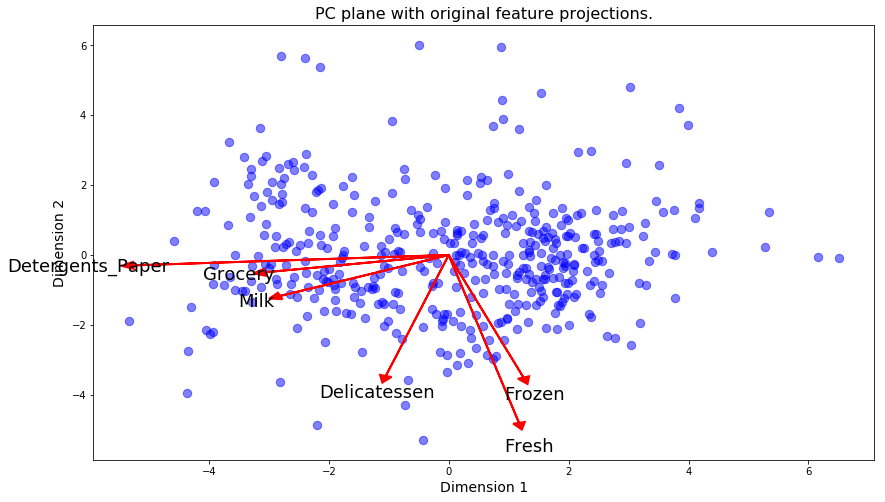

In [58]:

# exibe gráfico biplot
vs.biplot( good_data, reduced_data, pca ) 


## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica:** Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resp. 6.1: Algoritmo K-Means**

**VANTAGENS**
- Permite detectar possíveis padrões, independente da distância dos dados, porém fica preso a formas geométricas conhecidas, populares, comuns.
- Quanto mais próximos os dados, melhor a sua forma é traçada.

**DESVANTAGENS**
- Apresenta mapeamento falho para agrupamentos de dados os quais possuam formas atípicas (formas curvilíneas, oval, elípticas).
- Geralmente não lida bem com valores ausentes (NaN) para classificar dados.

**EXEMPLOS DE APLICAÇÕES ÚTIL PARA MAPEAR**
- Perfis de comportamento, compra, gostos, avaliações ou pensamento das pessoas, com base em seu histórico de ações em um sistema.

**OBSERVAÇÕES**
- Sempre busca encontrar agrupamentos circulares, esféricos ou hiperesféricos em dimensões mais altas.
- É útil em casos em que você sabe o número de agrupamentos.


**Resp. 6.2: Algoritmo Agrupamento Modelo de Mistura Gaussianas (em inglês Gaussian Mixture Models, GMM)**

**VANTAGENS**
- Permite realizar agrupamentos poderosos, composto por agrupamentos múltiplos. Onde todos os dados são inclusos, nenhum fica de fora, constituindo diferentes camadas se necessário for ( lembra a ideia de um Diagrama de Venn ).

**DESVANTAGENS**
- Apresenta forte sensibilidade na escolha de parâmetros para sua análise e performance de trabalho.
- Em virtude de realizar múltiplas análises complexas, consome poder de processamento, resultando em lentidão dos processos.
- Não importa quantas vezes o algoritmo rode, ele está suscetível a convergir sempre nos mesmos lugares, daí a expressão “ótimo local” (em inglês optimum local).

**EXEMPLOS DE APLICAÇÕES ÚTIL PARA MAPEAR**
- Fazer engenharia reversa em contextos onde os dados possivelmente estejam misturados. Com isso busca-se desmembrar em grupos cada cenário. Quando um dado agrupamento contiver outros agrupamentos dentro. 
- Mapear diferentes documentos, diferentes aplicações na biometria, como voz, íris ou impressões digitais, analisar tráfego de objetos em estrada, abaixo da água, em voo, em órbita (estrelas e planetas), microscopicamente. Aplicações na visão computacional, como detecção de fundo de imagens e detecção de objetos em movimento de modo geral.

**OBSERVAÇÕES**
- Os parâmetros iniciais do algoritmo determinaram a performance dele de traçar resultados precisos.


**Resp. 6.3: Ambos os algoritmos ( K-Means & GMM ) são fortes candidatos a mapear os grupos de dados. Porém os dados ( 2 dimensões Vs gráfico biplot ) apresentam-se embaralhados, aleatórios, dispersos e nitidamente sob uma forma irregular, então o algoritmo K-Means PODE NÃO apresentar uma boa performance esperada no conjunto de dados. Enquanto que o algoritmo GMM será capaz de mapear as formas irregulares, realizando agrupamentos múltiplos, sem deixar nenhum dado de fora, sobretudo o conjunto de dados por estar disperso, embaralhado e aleatório, remete a ideia de um Diagrama de Venn, o qual acredito será melhor representado pelo GMM. Portanto, algoritmo escolhido para aplicação: GMM.**


### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [59]:

# função para automatizar a criação repetitiva de Clusters
def f_applyNumCluster( nClusters ):

    # aplica algoritmo de clustering
    clusterer = mixture.GaussianMixture( n_components = nClusters )
    clusterer.fit( reduced_data )

    # preve o cluster para cada ponto de dado
    preds = clusterer.predict( reduced_data )

    # retorna os centros do cluster
    centers = clusterer.means_

    # preve o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict( pca_samples )

    # calcula a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score( reduced_data, preds, metric='mahalanobis' )
    print( '{:0.7f} Vs {:0>2} : precisão Vs número de agrupamentos.' .format( score, nClusters ))
    

In [92]:

# estrutura de repetição para buscar mapear os melhores agrupamentos possíveis
for nClusters in list( range( 2, 24 )):
    f_applyNumCluster( nClusters )
    

0.3759860 Vs 02 : precisão Vs número de agrupamentos.
0.3665137 Vs 03 : precisão Vs número de agrupamentos.
0.3333691 Vs 04 : precisão Vs número de agrupamentos.
0.1855823 Vs 05 : precisão Vs número de agrupamentos.
0.2651181 Vs 06 : precisão Vs número de agrupamentos.
0.3315576 Vs 07 : precisão Vs número de agrupamentos.
0.3215784 Vs 08 : precisão Vs número de agrupamentos.
0.2950611 Vs 09 : precisão Vs número de agrupamentos.
0.3111695 Vs 10 : precisão Vs número de agrupamentos.
0.3117759 Vs 11 : precisão Vs número de agrupamentos.
0.3360805 Vs 12 : precisão Vs número de agrupamentos.
0.3204785 Vs 13 : precisão Vs número de agrupamentos.
0.3083260 Vs 14 : precisão Vs número de agrupamentos.
0.2926444 Vs 15 : precisão Vs número de agrupamentos.
0.2999448 Vs 16 : precisão Vs número de agrupamentos.
0.2793740 Vs 17 : precisão Vs número de agrupamentos.
0.3072276 Vs 18 : precisão Vs número de agrupamentos.
0.3009186 Vs 19 : precisão Vs número de agrupamentos.
0.2984576 Vs 20 : precisão V

### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?

**Resp.: Acima foi criado uma listagem de coeficientes de silhueta, onde são apresentados a precisão e o número de agrupamentos testados no algoritmo GMM de cluster. Foram testados de 2 até 23 agrupamentos. O agrupamento o qual apresentou maior score ( pontuação ) é o de 02 agrupamentos.**

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

In [70]:

""" ESCOLHA DO NÚMERO ÓTIMOS DE CLUSTER """

# aplica algoritmo de clustering
clusterer = mixture.GaussianMixture( n_components = 2 )
clusterer.fit( reduced_data )

# preve o cluster para cada ponto de dado
preds = clusterer.predict( reduced_data )

# retorna os centros do cluster
centers = clusterer.means_

# preve o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict( pca_samples )

# calcula a média do coeficiente de silhueta para o número de clusters escolhidos
score = silhouette_score( reduced_data, preds, metric='mahalanobis' )
print( '{:0.7f} Vs {:0>2} : precisão Vs número de agrupamentos.' .format( score, nClusters ))


0.3761557 Vs 02 : precisão Vs número de agrupamentos.


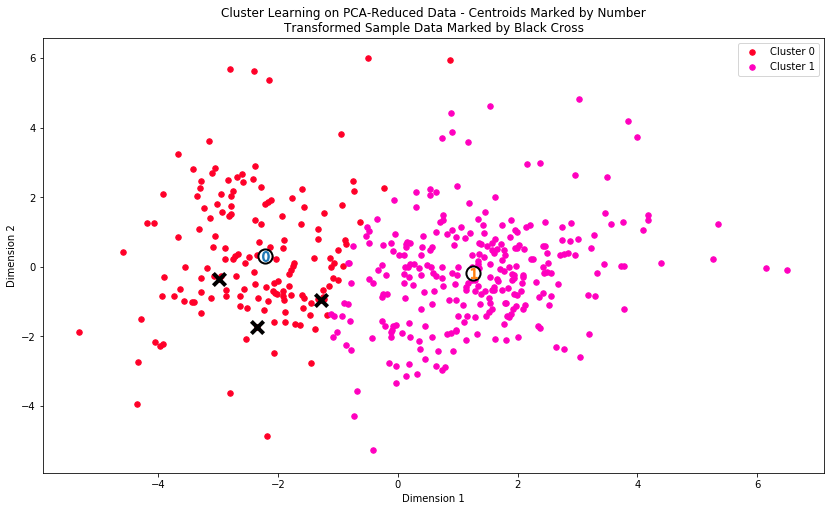

In [71]:

# exibe resultados do clustering da implementação
vs.cluster_results( reduced_data, preds, centers, pca_samples )


### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [72]:

# realiza a transformação inversa dos centros
log_centers = pca.inverse_transform( centers )

# realiza a transformação inversa dos logarítmos dos centros, ou seja, a exponenciação dos centros
true_centers = np.exp( log_centers )

# exibe os verdadeiros centros
segments = [ 'Segment {}'.format( i ) for i in range( 0, len( centers )) ]
true_centers = pd.DataFrame( np.round( true_centers ), columns = data.keys() )
true_centers.index = segments
display( true_centers )


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3567.0,7860.0,12249.0,873.0,4713.0,966.0
Segment 1,8939.0,2108.0,2758.0,2073.0,352.0,730.0


### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

**Resp.:**
- Clientes que se enquadram na categoria Segment 0 ( segmento ZERO ) são clientes que gastam mais com: Grocery ( Secos & Molhados ), Milk ( Lacticínios ) e por fim com Detergents_Paper ( Limpeza & Higiene ), certamente são clientes que possuem estabelecimento comercial voltados a fabricação/venda de produtos salgados, tal como um restaurante, bar, lanchonetes, fábricas de pães por exemplo. 
- Clientes que se enquadram na categoria Segment 1 ( segmento UM ) são clientes que gastam mais com: Fresh ( Perecíveis ), Grocery ( Secos e Molhados ) e por fim com Milk ( Lacticínios ), certamente são clientes que possuem estabelecimento comercial voltados a fabricação/venda de produtos salgados/doces, tal como um restaurante, bar, lanchonetes, cafeterias, padarias, por exemplo.

**IMPORTANTE!! A análise em questão leva asuposição de possíveis e eventuais estabelecimentos comerciais, é o que o algoritmo aponta de posse dos dados em mãos, maiores detalhes é sempre interessante fazer-se uma pesquisa de mercado com os clientes ( pesquisa discreta / direta ), por meio de questionários, cadastros e eventuais descontos a serem dados conforme participação das ações - OU - por meio de pesquisas discretas / indiretas, onde por meio de análises de propagandas on/off é possível averiguar a reação dos clientes a determinadas compras e descontos. Afirmar com convicção o tipo de estabelecimento comercial que os clientes possuem nestas categorias se faz necessário maior estudos e pesquisas para comprovar tais hipóteses, uma vez que carecem de maiores detalhamentos, informações.**


### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [89]:

# exibe as previsões
for i, pred in enumerate( sample_preds ):
    print( "Sample point", i, "predicted to be in Cluster", pred )

display( data_samples )


Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11594,7779,12144,3252,8035,3029
1,3067,13240,23127,3941,9959,731
2,16448,6243,6360,824,2662,2005


**Resp. 9.1:** 
- Amostra de ponto 0, se enquadra no Cluster 0.
- Amostra de ponto 1, se enquadra de igual forma no Cluster 0 e no Cluster 1.
- Amostra de ponto 2, se enquadra no Cluster 1.

**IMPORTANTE!! Lembre-se que o score do algoritmo gira em torno de 30%, o mesmo apresenta margens de erro. No quesito clustering, determinar padrões de compra, os dados se apresentam aleatórios, bagunçados e não necessariamente seguem uma regra única, a qual seja aplicada em todos os dados. Pelo contrário, as compras assumem um comportamento único o qual é abstraído em 30% dos casos, os demais 70% ( margem de erro ) predizem comportamentos dispersos, variados, aleatórios, individuais de cada caso a caso.**

**Resp. 9.2: Não cada amostra de ponto varia, hora acertando com o cluster ( margem de acerto de 30% ), hora errando ( margem de erro de 70% ). A justificativa a esse comportamento encontra-se acima mencionada com maiores detalhes.** 


## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resp.: Se o propósito do distribuidor é estabelecer novas regras na entrega dos produtos - E - com isso averiguar potenciais impactos dessas mudanças, afim de determinar quais clientes reagiram melhor ou pior as mudanças, basta analisar a categoria dos produtos vendidas e estabelecer aspectos teóricos / práticos para com o modelo de negócio, prever eventuais impactos nas mudanças. Exemplo: são 06 categorias de produtos, as quais pertencem a comida ( perecível, não perecível, salgados, doces, líquidos, sólidos ) e a higiêne e limpeza, algumas destas categorias tendem a ter uma rotatividade / consumo maior, ao passo em que outras possuirão uma rotatividade / consumo menor, as estatísticas quanto a compra podem determinar quais clientes tenderão a reagir de forma positiva ou negativa as novas mudanças nessa situação.**

**Inevitavelmente cada cliente reagirá de uma forma diferente, uma vez que existem diferentes perfis de consumidor, negócios e necessidades a serem satisfeitas. Via de regra, o caminho ideal seria determinar qual o perfil de consumidor mais marcante no histórico de compras - E - confrontar com o total de gastos deste perfil de cliente na história de compras, para analisar qual é o perfil que mais gasta em compras e qual é o perfil que mais realiza compras no estabelecimento ao longo do ano. De posse dessas informações, tomar decisões visando a reação POSITIVA deste perfil de cliente. Isso claro se a mudança na entrega realmente for necessário ser realizado, dar preferência ao perfil de cliente o qual visamos fidelizar no presente / futuro no negócio.**

**Caso a mudança não possa ser feita, uma vez que contraria os interesses do cliente mais marcante na empresa - chamamos isso de cliente ESTRELA - então é interessante passar um relatório aos supervisores e contrariar a nova regra, deixar claro os impactos negativos que esta trará, problemas e transtornos no curto, médio e longo prazo.**

**Outra forma de propor a mudança é aplicando o teste A/B nos cluster ( 0 e 1 ) determinados anteriormente no modelo, com isso teremos testes diferentes sendo realizados para grupos diferentes, o que seria algo de 04 grupos ( cluster 0A, 0B, 1A, 1B ), conforme os testes forem realizados averiguar o nível de satisfação dos clientes ( pesquisa de mercado ) Vs compras dos clientes ( análise do histórico de compras no período ). O resultado determinará se a mudança é viável OU não a empresa, se deve ser adotada de modo geral a empresa como um todo OU não. Embora seja algo mais "prático" de ser estabelecido, resulta em maior tempo para analisar e tomar decisões, bem como lidar com reações adversas das pessoas no decorrer do processo das mudanças ( treinamento, pesquisas, atendimento ao cliente, orientação, coleta de dados, cadastro, etc ).**

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resp.: Seguem passos / tratativas a solução:**
- Passo 01, Aprendizado NÃO Supervisionado, classifica a base de dados segmentando-a em padrões de clientes, usando clustering, algoritmo GMM.
- Passo 02, Conciliar a Base de Dados Segmentada em Categorias, junto aos resultados do Teste A/B executado anteriormente, sobre o tipo de entrega a ser realizado para aquela categoria de cliente.
- Passo 03, Aprendizado Supervisionado, classifica a NOVA base de dados, onde com base no gasto anual nas respectivas categorias de produtos, irá determinar se um eventual cliente pertence ou não pertence a determinada categoria de cliente. Ou seja, se o cliente faz parte do grupo 0A (cluster 0 deseja entrega A), 0B (cluster 0 deseja entrega B), 1A (cluster 1 deseja entrega A), 1B (cluster 1 deseja entrega B).
- Passo 04, Finalmente, após todas as transformações e classificações realizadas na Base de Dados, aplicamos Aprendizado Supervisionado para INFERIR a qual categoria os novos clientes pertences, onde informaremos ao algoritmo a projeção de gastos anuais como sendo suas respectivas entradas e ele nos devolverá a qual categoria esse cliente pertence, como sendo a sua saída.

**IMPORTANTE! Alguns dos algoritmos possíveis de serem usados no Aprendizado Supervisionado para a questão: Máquina Vetor de Suportes, Árvore de Decisão.**

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

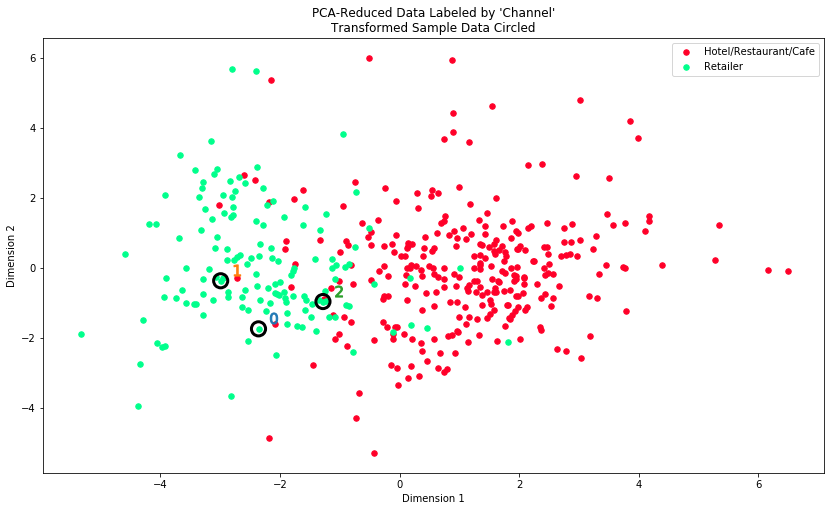

In [93]:

# exibe os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results( reduced_data, outliers, pca_samples )


### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resp. 12.1: Se pensarmos em todas as hipóteses possíveis: café, lanchonete, restaurante, bar, boate, fábricas de comidas, rotisserias, self-services, padarias, varejistas, supermercados, hotéis, pousadas, dentre outras quanto possíveis, certamente uma precisão de 30% na hora de validar os dados é uma precisão alta, uma vez que é complexo determinar uma regra a qual generalize o comportamento de consumidor nos dados, ou seja, achar uma agulha no meio do palheiro. O número de clusters sendo 2 apresentou maior score, logo ele é capaz de generalizar bem o modelo como um todo.**

**Resp. 12.2: Não, como dito anteriormente há N SEGMENTOS de clientes potenciais, possíveis, a complexidade da vida exige compreender a diversidade dos fatos. Neste exemplo em questão, os dados apresentam-se bagunçados, com ruídos, aleatórios, dispersos e se formos levar ao pé da letra as hipóteses possíveis de classificação, podemos dizer que os dados que fogem da margem de 30% de precisão do algoritmo GMM tendem a SINGULARIDADE ( característica do quão único é/são ) dos fatos. Ou seja, são casos difíceis de se mapear e determinar a qual classe real pertencem.**

**Resp. 12.3: Honestamente? Minhas classificações anteriores foram bem superficiais, tal como a atual classificação do gráfico acima. Como disse, se formos levar ao pé da letra, existem N classificações possíveis, ainda assim é possível observar que o mapeamento usando 2 cluster possui um score superior ao mapeamento usando maiores números de cluster, isso deixa claro a SINGULARIDADE de alguns dos perfis de clientes. Logo podemos concluir que os dados necessitariam de maiores análises e preparação para chegarmos a análises mais criteriosas e maiores cuidados a tirarmos conclusões específicas. TODAVIA a margem de 30% denota uma regra capaz de generalizar BEM os dados, enquanto os demais 70% se demonstram SINGULARES a questão. Uma ideia seria assumir que cluster 0 são estabelecimentos de porte pequeno e/ou faturamento pequeno, enquanto cluster 1 são estabelecimentos de porte médio/grande e/ou faturamento grande. O e/ou entra no quesito de preencher a lacuna dos 70% da margem de erro, onde passamos a analisar os segmentos de clientes em virtude do faturamento e tamanho de seu negócio, seria algo a se pensar em um projeto futuro, por exemplo.**

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.